In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.environ["PYQULAROOT"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

import numpy as np

# Magnetism
In this session we will address several examples about magnetism in 2D materials

## Magnetic order in a 1D linear chain
We will start showing the magnetic instabilities of a 1D chain at half filling, with two sites per unit cell

([], [])

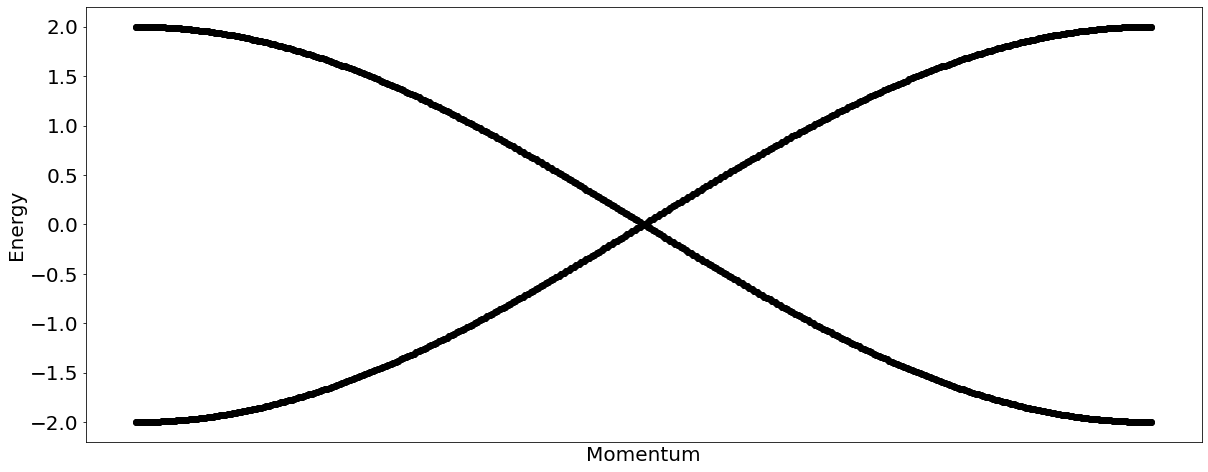

In [2]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

([], [])

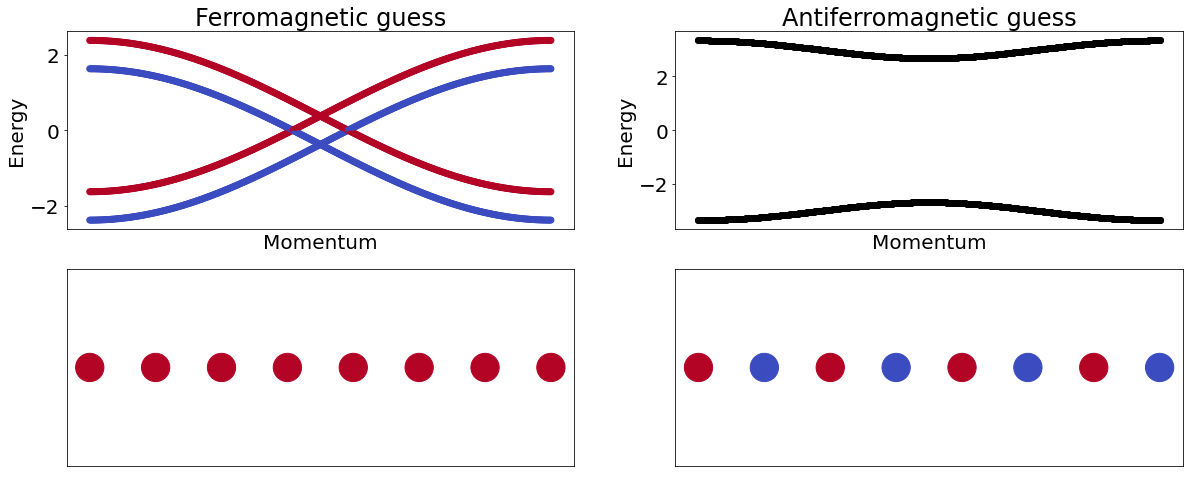

In [3]:
# let us now add interactions, and compute the electronic structure
U = 6.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")
hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro") # solve the interacting problem with a mean-field guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = hfe.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([])

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro") # solve the interacting problem with a mean-field guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = haf.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([])

### Exercise
- Discuss which solution you think it has the lowest energy, and why
- Compute the selfconsistent solution for stronger values of the interaction. Which change do you observe?

Text(0, 0.5, 'Energy FE - AF')

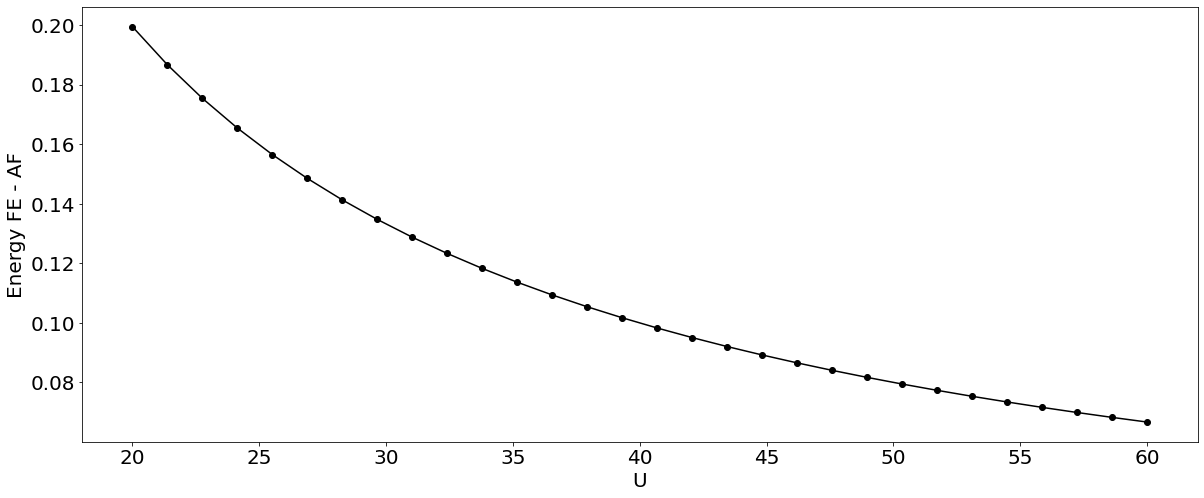

In [4]:
# let us now compute the energy difference as a function of U
def get_energy_difference(U):
    g = geometry.bichain() # generate a chain with two sites per unit cell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (hfe,efe) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="ferro",mix=0.9) # FE
    (haf,eaf) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="antiferro",mix=0.9) # AF
    return efe - eaf

Us = np.linspace(20.,60,30) # values of U considered

Et = [get_energy_difference(U) for U in Us] # energy differences

plt.plot(Us,Et,c="black",marker="o") # plot total energy VS value of U
plt.xlabel("U") ; plt.ylabel("Energy FE - AF")

### Exercise
- Discuss why the dependence of 1/U is observed in the energy differences between FE and AF configurations
- Compute this very same curve but going to lower values of U. Why does the 1/U behavior break down?

## Non-collinear magnetism from competing interactions
Let us now include further neighbor hoppings, which promotes competing magnetic interactions

(-10.45, 10.45, -0.05500000000000001, 0.05500000000000001)

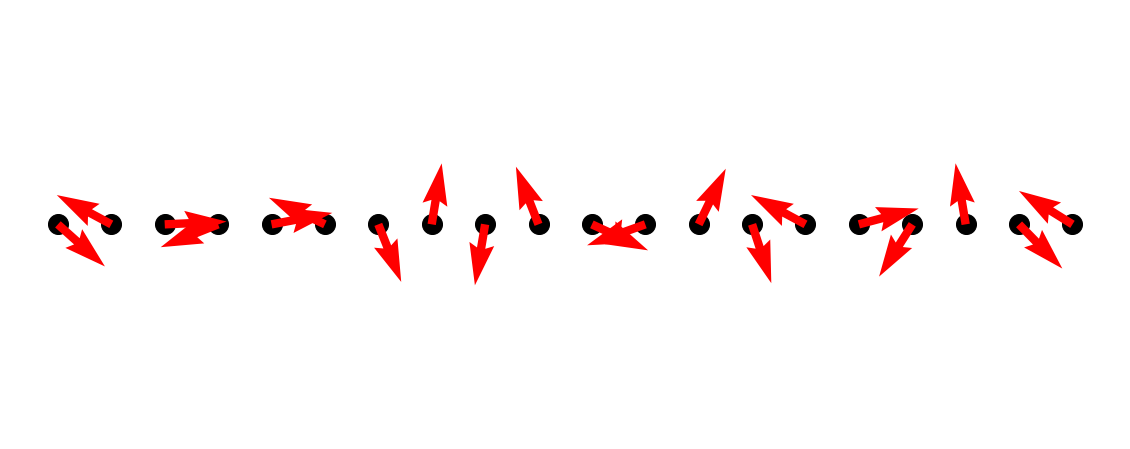

In [5]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(20) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian(tij=[1.,.6]) # generate the Hamiltonian

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why including second neighbor hopping gives rise to a non-collinear magnetic state
- Is there a long neighbor hopping that can be included that does not lead to non-collinearity? Include it and show that you recover the antiferromagnetic state

## Magnetic instabilities of the square lattice
Let us now address the magnetic instabilities of the square lattice

(-3.85, 3.85, -3.85, 3.85)

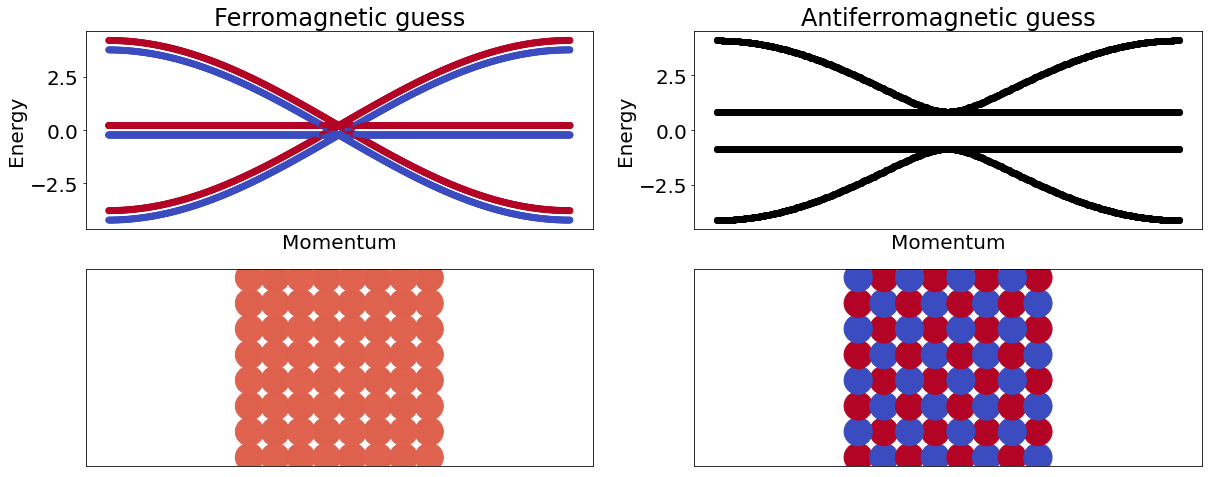

In [6]:
g = geometry.square_lattice_bipartite() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 3.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")
hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro",mix=0.9) # FE guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = hfe.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # AF guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = haf.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")

## Magnetic instabilities of the honeycomb lattice
Let us now address the magnetic instabilities of the honeycomb lattice, and see the interplay between charge and spin order

([], [])

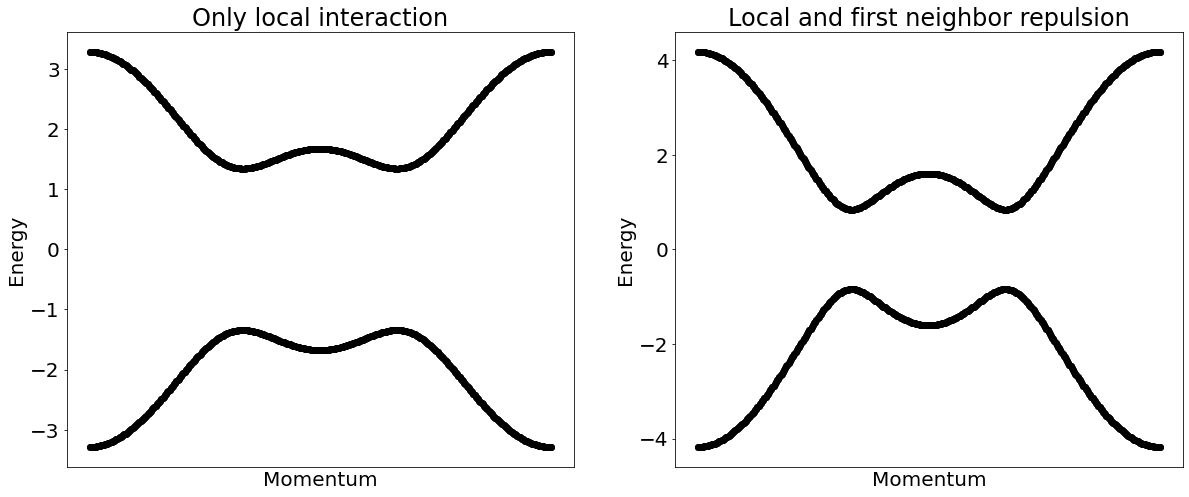

In [7]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 4.0 # value of the local interaction
V = 1.5 # value of the first neighbor interaction

# first with U
plt.subplot(1,2,1)
plt.title("Only local interaction")
hU = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # only U
(k,e) = hU.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# and with U and V
plt.subplot(1,2,2)
plt.title("Local and first neighbor repulsion")
hUV = h.get_mean_field_hamiltonian(U=U,V1=V,mf="antiferro",mix=0.9) # U and V
(k,e) = hUV.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Discuss what is the impact of first neighbor repulsion. Is it promoting or quenching magnetic order?
- Take a value of U slight above the critical one (U=2.3), and add a small first neighbor repulsion. Do you observe magnetic order?